In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgbm

In [86]:
df = pd.read_csv("hospital_resubmissions_final.csv")
df.head()

,Unnamed: 0,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,0,3,8,72,1,18,2,0,0,4,0,7,6,1,1,0,1,0
1,1,3,3,34,2,13,0,0,0,5,6,6,6,1,1,0,1,0
2,2,1,5,45,0,18,0,0,0,4,0,0,0,1,1,1,1,1
3,3,3,2,36,0,12,1,0,0,4,0,6,1,1,1,1,1,1
4,4,2,1,42,0,7,0,0,0,3,6,0,7,1,1,0,1,0


In [87]:
df.drop("Unnamed: 0", axis =1, inplace = True)

In [74]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,3,8,72,1,18,2,0,0,4,0,7,6,1,1,0,1,0
1,3,3,34,2,13,0,0,0,5,6,6,6,1,1,0,1,0
2,1,5,45,0,18,0,0,0,4,0,0,0,1,1,1,1,1
3,3,2,36,0,12,1,0,0,4,0,6,1,1,1,1,1,1
4,2,1,42,0,7,0,0,0,3,6,0,7,1,1,0,1,0


In [75]:
df.corr()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
age,1.000000,0.086268,0.028796,-0.093356,-0.039604,0.019860,-0.021917,-0.070886,-0.027602,-0.017524,-0.011906,-0.022512,0.003367,0.064382,-0.053464,-0.025739,0.030289
time_in_hospital,0.086268,1.000000,0.328326,0.179249,0.449415,-0.011309,0.076916,-0.013115,0.043180,0.030004,0.088306,0.074885,-0.039572,-0.024386,0.107344,0.064219,0.043141
n_lab_procedures,0.028796,0.328326,1.000000,0.048827,0.271741,-0.004309,0.043713,-0.004929,-0.073420,-0.026125,0.052641,0.067031,-0.029715,-0.091193,0.062321,0.031342,0.032970
n_procedures,-0.093356,0.179249,0.048827,1.000000,0.368681,-0.034796,-0.069078,-0.042906,-0.017974,-0.241709,-0.121367,-0.064316,-0.007961,0.001345,-0.000009,-0.010414,-0.044467
n_medications,-0.039604,0.449415,0.271741,0.368681,1.000000,0.043185,0.065572,0.012944,0.088286,-0.050642,0.003524,0.009366,-0.040051,-0.017831,0.248529,0.195735,0.036871
n_outpatient,0.019860,-0.011309,-0.004309,-0.034796,0.043185,1.000000,0.127736,0.096912,0.052684,0.010055,0.024598,0.013625,0.008546,-0.006783,0.025531,0.014043,0.095487
n_inpatient,-0.021917,0.076916,0.043713,-0.069078,0.065572,0.127736,1.000000,0.220285,0.013816,0.016539,0.039194,0.025064,-0.011417,0.016944,0.012442,0.020978,0.212480
n_emergency,-0.070886,-0.013115,-0.004929,-0.042906,0.012944,0.096912,0.220285,1.000000,-0.016577,0.030374,0.044488,0.029028,-0.002418,0.004205,0.029221,0.017901,0.093519
medical_specialty,-0.027602,0.043180,-0.073420,-0.017974,0.088286,0.052684,0.013816,-0.016577,1.000000,0.100901,0.067086,0.030745,0.005818,0.049592,-0.029648,-0.014970,-0.018145
diag_1,-0.017524,0.030004,-0.026125,-0.241709,-0.050642,0.010055,0.016539,0.030374,0.100901,1.000000,0.169757,0.083559,0.000308,0.029283,0.019518,0.007242,-0.020091


<Axes: >

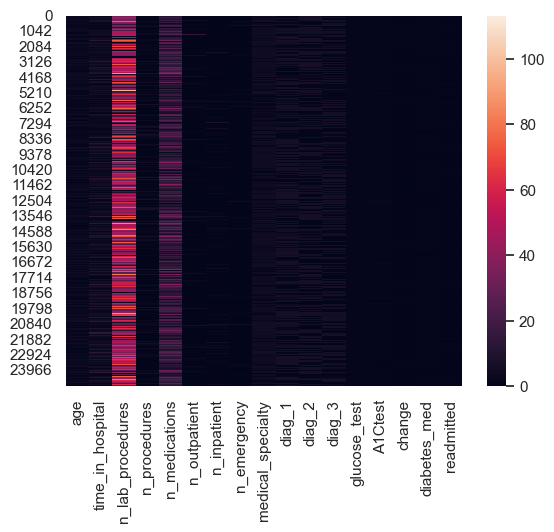

In [76]:
sns.heatmap(df)

In [77]:
y = df[["readmitted"]]

In [78]:
X = df.drop("readmitted", axis = 1, inplace=True)

ValueError: x, y, and format string must not be None

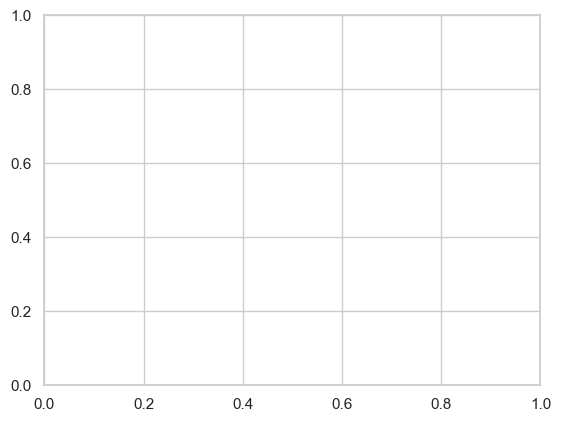

In [79]:
plt.plot(X, y)

In [80]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med'],
      dtype='object')

In [81]:
np.average(df["time_in_hospital"])

4.45332

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
model = LogisticRegression()

In [88]:
X = df.drop("readmitted", axis = 1)

In [89]:
y = df[["readmitted"]]

In [90]:
model.fit(X, y)

/Users/helloworld/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/helloworld/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
LogisticRegression()

LogisticRegression()

In [92]:
model = lgbm.LGBMRegressor(n_estimators = 500)
x = X
y = y

In [93]:
model.fit(x,y)

LGBMRegressor(n_estimators=500)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

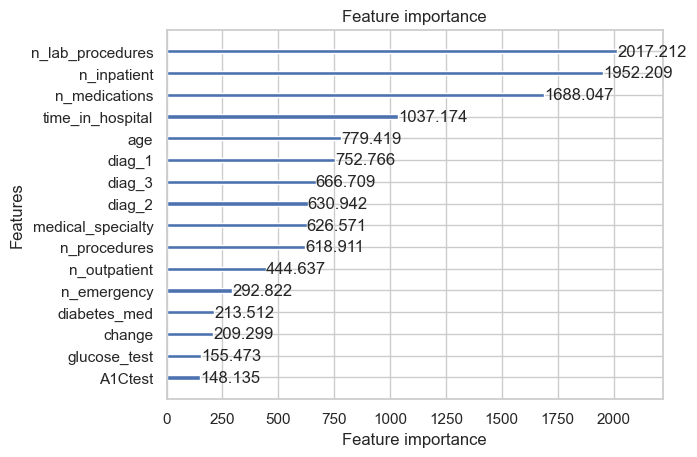

In [94]:
lgbm.plot_importance(model, importance_type="gain")

<Axes: title={'center': 'Split value histogram for feature with name n_lab_procedures'}, xlabel='Feature split value', ylabel='Count'>

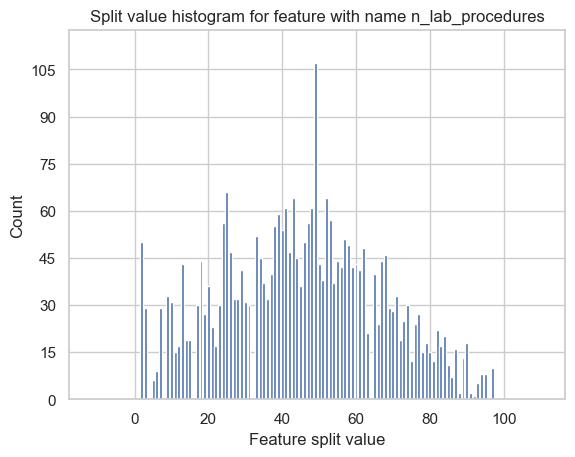

In [95]:
lgbm.plot_split_value_histogram(model, feature="n_lab_procedures")